### 1. Import library

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### 2. EDA

In [3]:
path = "./img/train"
class_names = ['battery', 'cardboard','clothes', 'human', 'metal','paper', 'phone', 'plastic']
total = 0

for name in class_names:
    name_path = os.path.join(path, name)
    num = len(os.listdir(name_path))
    total += num
    print("Number of " + name + " image:" + str(num))

print("Total number of image: " + str(total))

Number of battery image:357
Number of cardboard image:402
Number of clothes image:332
Number of human image:448
Number of metal image:409
Number of paper image:592
Number of phone image:508
Number of plastic image:453
Total number of image: 3501


### 3. Pre-processing

In [4]:
batch_size = 128
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150
split = 0.2
total_val = total * split
total_train = total - total_val
print("Total number of training set: " + str(total_train))
print("Total number of validation set: " + str(total_val))

Total number of training set: 2800.8
Total number of validation set: 700.2


In [5]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=split,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5
                                   )

In [6]:
train_generator = data_generator.flow_from_directory(directory=path,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    subset='training')

validation_generator = data_generator.flow_from_directory(directory=path,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    subset='validation')

Found 2805 images belonging to 8 classes.
Found 696 images belonging to 8 classes.


### 4. Visualisation

In [7]:
def plotImg(img, label):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img[i])
        plt.xlabel(class_names[int(label[i])])
    plt.show()

In [8]:
sample_img_train, sample_label_train = next(train_generator)

In [10]:
print(sample_label_train)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
val_img_lab = get_image_label(validation_generator)

NameError: name 'get_image_label' is not defined

TypeError: only size-1 arrays can be converted to Python scalars

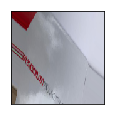

In [9]:
plotImg(sample_img_train, sample_label_train)